In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("Mall.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


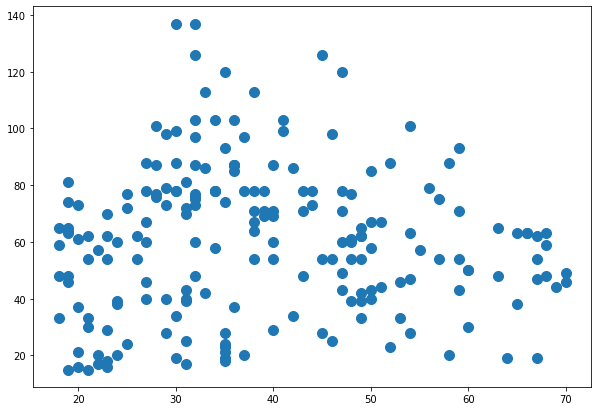

In [2]:
datasubset=data.loc[:,["Age","Annual Income (k$)"]]
plt.figure(figsize=(10,7))
plt.scatter(datasubset[['Age']],datasubset[['Annual Income (k$)']],s=100)

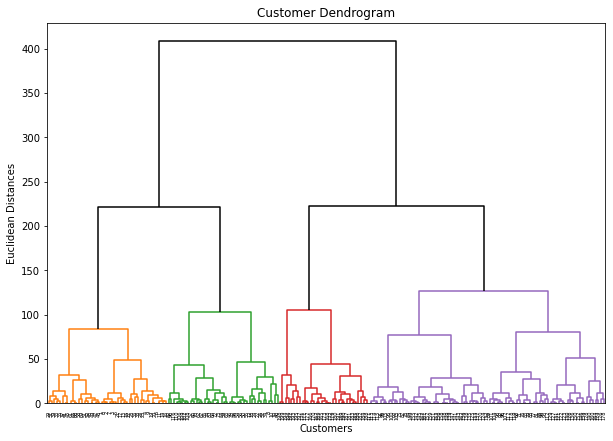

In [3]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.title('Customer Dendrogram')
dend=shc.dendrogram(shc.linkage(datasubset,method='ward'),color_threshold=150,above_threshold_color='black')

0.36930163803129956

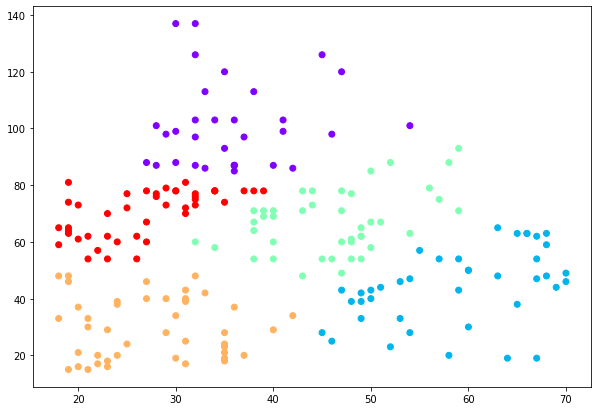

In [8]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cl=cluster.fit_predict(datasubset)
plt.figure(figsize=(10,7))
plt.scatter(datasubset[['Age']],datasubset[['Annual Income (k$)']],c=cluster.labels_,cmap='rainbow')
from sklearn.metrics import silhouette_score
silhouette_score(datasubset,cl)